<h2><center> 🔰 🏰 Clash Of Clans Esport - The Perils and Commitment of Competitive Ranking 🗡️ 🎯 </center></h2>

<h4><center> From Raw Data To Analytic Insights: Data Cleaning, Exploration, and Data Science Revelation </center></h4>

<p><b>Dataset Author:</b> Asaniczka. (2024). <i>Clash of Clans Clans Dataset 2023 (3.5M Clans)</i>. Kaggle. 
<a href="https://www.kaggle.com/datasets/asaniczka/clash-of-clans-clans-dataset-2023-3-5m-clans?select=coc_clans_dataset.csv" target="_blank">[Link]</a></p>

<p><b>Official Source:</b> Clash Of Clans Statistics. <i>Supercell</i>. 
<a href="https://supercell.com/en/games/clashofclans/" target="_blank">[Link]</a></p>

<p><b>Predecessors</b>:
    <ul>
        <li> Berat, O. (2023). <i>Clash of Clans - Exploratory Data Analysis<i>. Kaggle. <a href="https://www.kaggle.com/code/beratozmen/clash-of-clans-exploratory-data-analysis" target="_blank">[Notebook]</a></li>
        <li> Thien, N. (2024). <i>Phân tích về clan trong clash of clans<i>. Kaggle. <a href="https://www.kaggle.com/code/nguyenthien3001/ph-n-t-ch-v-clan-trong-clash-of-clans" target="_blank">[Notebook]</a></li>
    </ul>
</p>

<p><b>EDA Revision & Extension:</b> Cresht</p>

### 📚 Libraries ⋆˙⟡ ###

In [1]:
#Backbone of the exploratory analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.figure
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

#Extension for OOP design
from abc import ABC, abstractmethod

#Extension for multiple savestates
import sys, os

#Deprecation Warning Surpass
import warnings
warnings.filterwarnings('ignore')

#Savestates graph
plot_all = {}

### 🗃️ Data Pipeline 📦 ###

In [2]:
folder = "elune-project-eda"

# Add current folder for linking to the (file package) module
sys.path.append(os.path.abspath(os.path.dirname(folder)))  
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(folder), 'preprocessing')))

#Import necessary preprocessing features
from preprocessing.addons.label_encoding import LabelEncoding
from preprocessing.addons.onehot_encoding import OneHotEncoding
from preprocessing.addons.boxcox_transformer import BoxCoxTransformer
from preprocessing.addons.yeojohnson_transformer import YeoJohnsonTransformer
from preprocessing.addons.minmax_scaler import MinMax_Scaler
from preprocessing.addons.standard_scaler import Standard_Scaler
from preprocessing.addons.normalization_scaler import Normalization_Scaler
from preprocessing.addons.iqr_outlier import IQROutlierRemover
from preprocessing.addons.zscore_outlier import ZScoreOutlier
from preprocessing.addons.iqr_outlier_v2 import IQROutlierRemoverV2
from preprocessing.addons.zscore_outlier_v2 import ZScoreOutlierRemoverV2
from preprocessing.eda_pipeline import EDAPipeline, ColumnTransformerStep

### 📜 Introduction 🪶 ###

Clash Of Clans is the prominent mobile game released in 2012 with currently more than 95 million players and an average of 6.5 million daily active users (DAU). Through out seasonal peaks and subtle decline, the game remains long-lasting momentum during the rise of RPG-style figures (Andrea, K. 2025)<a href="https://www.blog.udonis.co/mobile-marketing/mobile-games/clash-of-clans-player-count" target="_blank">[1]</a>. This dataset was originally stripped from an eco-snapshot in 2023 by Asaniczka, revealed the static properties of around 3.5 million clans including conventional parameters, war metrics, etc.

In [3]:
#Dataset Overview : Clash Of Clans (2023)
df = pd.read_csv("coc_clans_dataset.csv")
df.head(5)

,clan_tag,clan_name,clan_type,clan_description,clan_location,isFamilyFriendly,clan_badge_url,clan_level,clan_points,clan_builder_base_points,...,clan_war_league,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,capital_league,mean_member_level,mean_member_trophies
0,#UQVQRJQ0,KOJIS' CLAN,closed,STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...,International,True,https://api-assets.clashofclans.com/badges/200...,6,6887,5213,...,Unranked,11,1000,1000,1,1,0,Unranked,83,1254
1,#2QC9Y0CQU,uye,open,NaN,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,876,1019,...,Unranked,1,0,0,1,0,0,Unranked,90,1752
2,#202CJRP2U,Uprising rivals,open,💥official uprising rivals clan💥we bring 10% lu...,Indonesia,True,https://api-assets.clashofclans.com/badges/200...,1,732,670,...,Unranked,2,0,0,1,0,0,Unranked,30,733
3,#2Y89RRGLY,2inchersonly,open,"Whom is not packing the meat, Shall be packing...",International,True,https://api-assets.clashofclans.com/badges/200...,2,1156,457,...,Bronze League I,2,0,0,1,1,0,Unranked,61,1156
4,#99PU9QPY,aymil,open,regla1=no empezar la guerra sin mi permiso reg...,International,True,https://api-assets.clashofclans.com/badges/200...,2,674,399,...,Unranked,2,0,0,1,0,0,Unranked,23,674


### 🚧 Dataset Characteristics: Uniqueness & Challenges 🚫 ###

This dataset is about 929mb with over 3 million data identities. The rare gem that distinguishes between other raw data inputs is the unique clan tag which specifies the individual clan without fear of duplicated clans despite identical names, additionally the description also nails down the diversity of clan culture. Following categorical columns are general properties, war statistics, constraints on Town Hall, Builder Hall levels as well as trophies accumulation on both environments. <p>
Despite glamourous numeric columns, the prosperity often correlates with potential hurdles that demand strenuous efforts beyond surface-level investigation in accordance to most data analysis workload.
- Badge URL: Already compiled into URL structure, requiring special scraping techniques
- Description: Some of the fonts are displayed invalid or unrecognizable due to different language format.
- Clan tag, name and location (High-cardinality features with exacting dimensionality): Large proportion of classification that may overwhelm the users after preprocessing into numeric forms.
- Duplicated columns: Some scenarios where Builder Base Clan Points are similar to Clan Versus Points, as well trophies on both of categories.
- The indifference of majority Clash Of Clans players towards Capital Clan: As evidence by significant volume of zero points contribution and consecutive "Unranked" results in league.


### 🌱 Categorical Features: Key Values & Insights 🎋 ###

A remarkable hint is observed during overview: **_Trophies accumulation or level experience do not reflect the overall performance_**.
- The inspection of any arbitrary clan groups seemingly follows the funnel-shape structure based on war mechanics and personal exposure to this brand game ever since the childhood of author (Cresht).
- External Achievements: Mean Member Level & Trophies, Clan Members
- Numerical Metrics: War Frequency, Wins / Losses / Ties matches, Win Streak
- Power Screening: Clan Type, Family Friendly (Y/N), Required Trophies (TH & Builder Base), Required Town Hall Level.
- Regular Expression: Clan Description, Badge (URL)  

### 📝 Static information 📒 ###

In this section, the investigation is initialized to interpret general properties of Clash Of Clans snapshots, which ensure noisy values are not accounted for misintepretation during Exploratory Data Analysis section, presumably better compatibility in modeling tasks.<p>
Some of the parts are involved:
- Surface-level Inspection
- NaN / Null & Missing value detection
- Duplicated Value Detection
- Categorical Column Counters
- Shallow Visualisation

#### 1. Surface-level inspection ####

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559743 entries, 0 to 3559742
Data columns (total 27 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   clan_tag                        object
 1   clan_name                       object
 2   clan_type                       object
 3   clan_description                object
 4   clan_location                   object
 5   isFamilyFriendly                bool  
 6   clan_badge_url                  object
 7   clan_level                      int64 
 8   clan_points                     int64 
 9   clan_builder_base_points        int64 
 10  clan_versus_points              int64 
 11  required_trophies               int64 
 12  war_frequency                   object
 13  war_win_streak                  int64 
 14  war_wins                        int64 
 15  war_ties                        int64 
 16  war_losses                      int64 
 17  clan_war_league                 object
 18  nu

In [5]:
df.describe()

,clan_level,clan_points,clan_builder_base_points,clan_versus_points,required_trophies,war_win_streak,war_wins,war_ties,war_losses,num_members,required_builder_base_trophies,required_versus_trophies,required_townhall_level,clan_capital_hall_level,clan_capital_points,mean_member_level,mean_member_trophies
count,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06,3.559743e+06
mean,2.349883e+00,2.576062e+03,2.562565e+03,2.562565e+03,3.760651e+02,2.082535e-01,1.750428e+01,2.143728e-01,9.981437e+00,4.758147e+00,2.305894e+02,2.305894e+02,2.195218e+00,5.651079e-01,6.836864e+01,4.884267e+01,8.971466e+02
std,3.298436e+00,5.863921e+03,5.866313e+03,5.866313e+03,8.334661e+02,1.016368e+00,6.050237e+01,1.355269e+00,3.696328e+01,8.287075e+00,7.362564e+02,7.362564e+02,2.733998e+00,1.607310e+00,3.652351e+02,3.868762e+01,5.874875e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.520000e+02,1.000000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,4.940000e+02
50%,1.000000e+00,6.930000e+02,6.470000e+02,6.470000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,7.900000e+02
75%,2.000000e+00,1.801000e+03,1.867000e+03,1.867000e+03,4.000000e+02,0.000000e+00,6.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+01,1.155000e+03
max,3.600000e+01,5.472100e+04,5.168600e+04,5.168600e+04,6.553500e+04,2.610000e+02,1.565000e+03,3.190000e+02,1.220000e+03,5.000000e+01,5.500000e+03,5.500000e+03,1.500000e+01,1.000000e+01,5.866000e+03,3.150000e+02,5.466000e+03


**Implicaions**: Statistical measurements show significant tendency due to such proportion of data entities and potential biased unranked clans

#### 2. NaN / Null & Missing Value Detection ####

In [6]:
df.isnull().sum()

clan_tag                                0
clan_name                              62
clan_type                               0
clan_description                  1351365
clan_location                     1451672
isFamilyFriendly                        0
clan_badge_url                          0
clan_level                              0
clan_points                             0
clan_builder_base_points                0
clan_versus_points                      0
required_trophies                       0
war_frequency                           0
war_win_streak                          0
war_wins                                0
war_ties                                0
war_losses                              0
clan_war_league                         0
num_members                             0
required_builder_base_trophies          0
required_versus_trophies                0
required_townhall_level                 0
clan_capital_hall_level                 0
clan_capital_points               

**Implications**: Numeric metrics are already in good state, while retanining disordered text description columns (with around 1.3 mllions invalid data points) and hidden clan locations (assuming the privacy).

#### 3. Duplicated Value Detection ####

In [7]:
#Clan entities
df.duplicated().sum()

0

In [ ]:
#Duplicated categorical column detection by using tranposing (exchanging the index and the columns)
duplicated_cols = df.T.duplicated()

print(df.columns[duplicated_cols])

**Implications**: Clan entities show no overlapped each other due to the uniqueness of Clan Tag. In terms of categorical columns, Builder Base and Versus features are often misunderstood as distinctive. In fact both of them contain similar values (Required BB - Versus Trophies & Clan Builder Base - Versus Levels)

#### 4. Categorical Column Counters ####

In [8]:
df["clan_location"].unique()

array(['International', 'Indonesia', 'Pakistan', nan, 'Türkiye',
       'Bahamas', 'Chile', 'Brazil', 'Philippines', 'Italy', 'Canada',
       'Mexico', 'Malaysia', 'India', 'Afghanistan', 'United States',
       'Iran', 'Germany', 'Uruguay', 'American Samoa', 'Thailand',
       'Vietnam', 'Greenland', 'Latvia', 'South Africa', 'Albania',
       'Japan', 'Hungary', 'Bangladesh', 'Norway', 'France',
       'Myanmar (Burma)', 'Kuwait', 'Australia', 'Bosnia and Herzegovina',
       'Ecuador', 'Kazakhstan', 'North Korea', 'Saudi Arabia',
       'New Zealand', 'Jamaica', 'China', 'Hong Kong', 'Panama',
       'United Kingdom', 'Barbados', 'Netherlands', 'Belgium', 'Russia',
       'Fiji', 'Uzbekistan', 'Swaziland', 'Dominican Republic', 'Iraq',
       'Portugal', 'Egypt', 'Israel', 'Western Sahara', 'Ireland',
       'Côte d’Ivoire', 'Heard & McDonald Islands', 'Åland Islands',
       'Bolivia', 'Samoa', 'Honduras', 'French Polynesia', 'Azerbaijan',
       'Andorra', 'Algeria', 'Anguilla', 

In [9]:
print(f"Total presence of clan countries: {df["clan_location"].nunique()}")

Total presence of clan countries: 255


In [10]:
#War Frequency:
df["war_frequency"].unique()

array(['moreThanOncePerWeek', 'unknown', 'always', 'never', 'oncePerWeek',
       'lessThanOncePerWeek'], dtype=object)

In [11]:
#Clan Types:
df["clan_type"].unique()

array(['closed', 'open', 'inviteOnly'], dtype=object)

#### 5. Shallow Visualisation ####

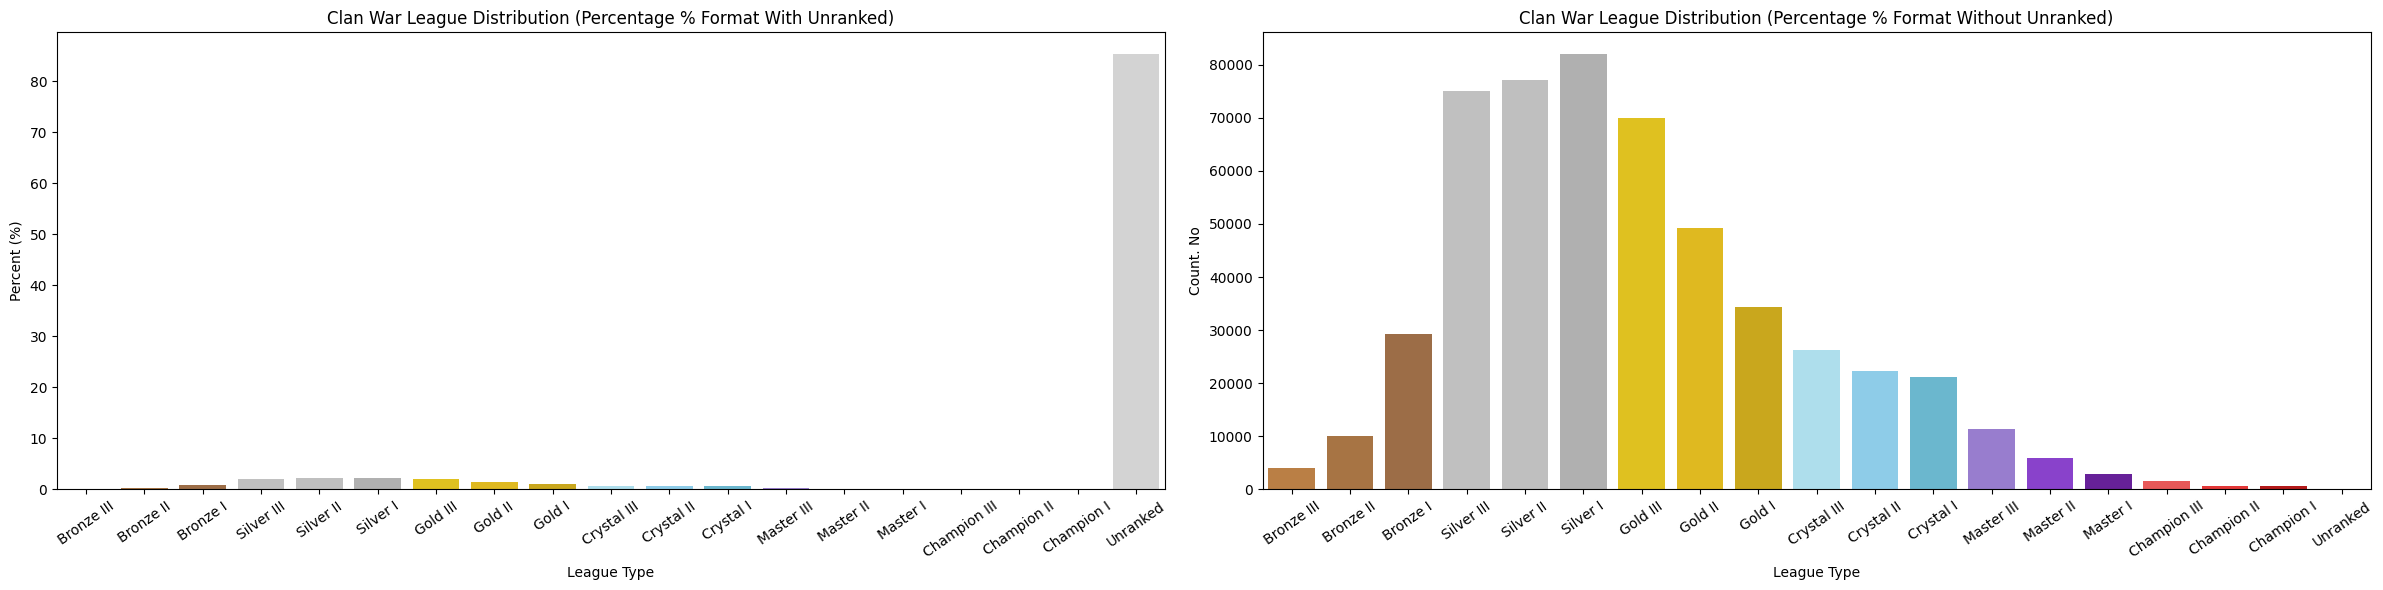

In [97]:
#Clan War League Distribution (With & Without Unranked League)

#Clan War League Occurrences
league_counts = df["clan_war_league"].value_counts().reset_index()
league_counts

#HEX colormap for equivalent leagues
league_colors = {
    "Bronze League III": "#cd7f32",
    "Bronze League II": "#b87333",
    "Bronze League I": "#aa6c39",
    "Silver League III": "#c0c0c0",
    "Silver League II": "#bfbfbf",
    "Silver League I": "#b0b0b0",
    "Gold League III": "#ffd700",
    "Gold League II": "#ffcc00",
    "Gold League I": "#e6b800",
    "Crystal League III": "#a3e4f7",
    "Crystal League II": "#7fd1f7",
    "Crystal League I": "#5bc0de",
    "Master League III": "#9370db",
    "Master League II": "#8a2be2",
    "Master League I": "#6a0dad",
    "Champion League III": "#ff4040",
    "Champion League II": "#ff1a1a",
    "Champion League I": "#cc0000",
    "Unranked": "#d3d3d3"
}

#Abbrevation
league_abbrv = {
    "Bronze League III": "Bronze III",
    "Bronze League II": "Bronze II",
    "Bronze League I": "Bronze I",
    "Silver League III": "Silver III",
    "Silver League II": "Silver II",
    "Silver League I": "Silver I",
    "Gold League III": "Gold III",
    "Gold League II": "Gold II",
    "Gold League I": "Gold I",
    "Crystal League III": "Crystal III",
    "Crystal League II": "Crystal II",
    "Crystal League I": "Crystal I",
    "Master League III": "Master III",
    "Master League II": "Master II",
    "Master League I": "Master I",
    "Champion League III": "Champion III",
    "Champion League II": "Champion II",
    "Champion League I": "Champion I",
    "Unranked": "Unranked"
}

#Ordinal leagues
league_customs = list(league_colors.keys())

#Safety check for league orders
league_counts = league_counts[league_counts["clan_war_league"].isin(league_customs)]
league_counts["clan_war_league"] = pd.Categorical(league_counts["clan_war_league"], categories = league_customs, ordered = True) #Labeled by order list

#Add color map and abbrevations to the league dataframe
league_counts["color"] = league_counts["clan_war_league"].map(league_colors)
league_counts["abbrv_league"] = league_counts["clan_war_league"].map(league_abbrv)

#Creating palette using abbrevations
abbrv_palette = dict(zip(league_counts["abbrv_league"], league_counts["color"]))

#Safe copies of with and without unranked league
full_league = league_counts.copy()
full_league["percent"] = (league_counts["count"] * 100) / league_counts["count"].sum()
valid_league = league_counts[league_counts["clan_war_league"] != "Unranked"].copy()
valid_league["clan_war_league"] = valid_league["clan_war_league"].cat.remove_categories(["Unranked"])

#Visualisation with barplot
fig, axes = plt.subplots(1, 2, figsize = (24, 6))

#Plot 1: With Unranked
sns.barplot(x = "abbrv_league", y = "percent", 
            data = full_league, 
            palette = abbrv_palette,
           ax = axes[0])
axes[0].set_title("Clan War League Distribution (Percentage % Format With Unranked)")
axes[0].set_xlabel("League Type")
axes[0].set_ylabel("Percent (%)")
axes[0].tick_params(axis = "x", rotation = 35)

#Plot 2: Without Unranked
sns.barplot(x = "abbrv_league", y = "count", 
            data = valid_league, 
            palette = abbrv_palette,
           ax = axes[1])
axes[1].set_title("Clan War League Distribution (Percentage % Format Without Unranked)")
axes[1].set_xlabel("League Type")
axes[1].set_ylabel("Count. No")
axes[1].tick_params(axis = "x", rotation = 35)

#For consistent layout
plt.tight_layout()
plt.show()

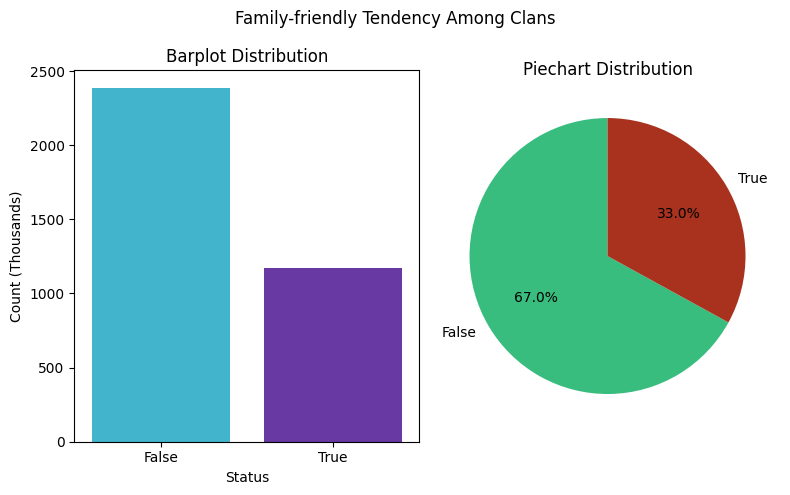

In [56]:
#Family Friendly
family_friendly = df["isFamilyFriendly"].value_counts().reset_index()
family_friendly["scaled_count"] = family_friendly["count"] / 1000
 
#Visualisation with barplot & piechart
fig, axes = plt.subplots(1, 2, figsize = (8, 5))

sns.barplot(x = "isFamilyFriendly", y = "scaled_count", data = family_friendly, ax = axes[0], palette = ["#2bc4e3", "#6626b5"])
axes[0].set_title("Barplot Distribution")
axes[0].set_xlabel("Status")
axes[0].set_ylabel("Count (Thousands)")

axes[1].pie(family_friendly["count"], labels = family_friendly["isFamilyFriendly"], autopct = "%1.1f%%", startangle = 90, colors = ["#39bd7f", "#a8321d"])
axes[1].set_title("Piechart Distribution")
fig.suptitle("Family-friendly Tendency Among Clans")

plt.tight_layout()
plt.show()

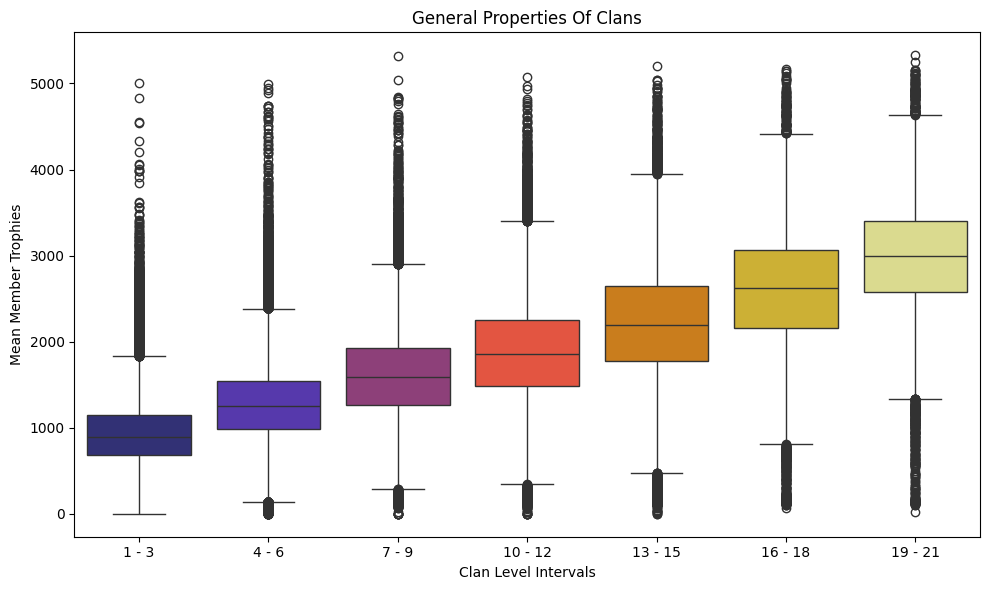

In [84]:
#pd.cut : Bin values into discrete intervals.
unranked_filtered = df[df["clan_war_league"] != "Unranked"].copy()

bins = [0, 3, 6, 9, 12, 15, 18, 21]
labels = ["1 - 3", "4 - 6", "7 - 9", "10 - 12", "13 - 15", "16 - 18", "19 - 21"]
unranked_filtered["clan_level_bin"] = pd.cut(unranked_filtered["clan_level"], bins = bins, labels = labels, right = True)

#Boxplot visualisation
plt.figure(figsize = (10, 6))
sns.boxplot(x = "clan_level_bin", y = "mean_member_trophies", data = unranked_filtered, palette="CMRmap")
plt.title("General Properties Of Clans")
plt.xlabel("Clan Level Intervals")
plt.ylabel("Mean Member Trophies")

plt.tight_layout()
plt.show()

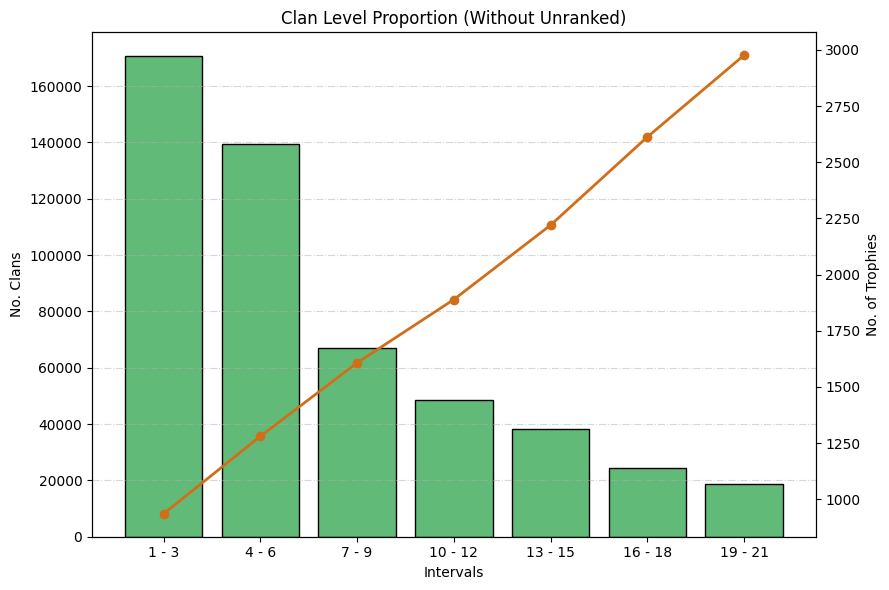

In [94]:
#Seperated Visualisations On Mean Member Trophies & Clan Levels. agg() : summarizing two values for each groups and peform operations (count, mean)
fig, ax = plt.subplots(1, 1, figsize = (9, 6))

level_dist = unranked_filtered.groupby("clan_level_bin").agg(clan_count = ("clan_level", "count"), mean_mem_trop = ("mean_member_trophies", "mean")).reset_index()

bar = sns.barplot(x = "clan_level_bin", y = "clan_count", data = level_dist, ax = ax, color="#53c970", edgecolor = "black")

bar.set_title("Clan Level Proportion (Without Unranked)")
bar.set_xlabel("Intervals")
bar.set_ylabel("No. Clans")
bar.grid(True, axis="y", linestyle="-.", alpha=0.5)


#Create second axis for mean member trophies
bar2 = bar.twinx()
bar2.plot(level_dist["clan_level_bin"], level_dist["mean_mem_trop"], color = "#d16f19", marker = "o", linewidth = 2, label = "Mean Member Trophies (Without Unranked)")
bar2.set_ylabel("No. of Trophies")

fig.tight_layout()
fig.show()

### 🧹 Feature Engineering & Data Cleaning 💨 ###

### 📊 Exploratory Data Analysis (Discussion) 📉 ###

### ⚙️ Data Preprocessing 🛠️ ###

### 📥 Savestates 🔖 ###

For further accessibility, seperated versions of this preprocessed dataset has been provided which offer various uses in Machine Learning field. Scientists and business - marketing analysts could be using plotting graphs as references alongsides gigantic plot retrieval provided beforehand.

#### 1. Interdisciplanary ML Dataset Versions ####

In [95]:
def save_dataset(df, filename, folder = "datasets", formats = []):
    os.makedirs(folder, exist_ok = True)
    for fmt in formats:
        path = os.path.join(folder, f"{filename}.{fmt}")
        if fmt == "csv":
            df.to_csv(path, index = False)
        elif fmt == "parquet":
            df.to_parquet(path, index = False)
        elif fmt == "xlsx":
            df.to_excel(path, index = False)
        print(f"Saving Completed: {filename} -> {fmt}")

#### 2. All-in-one Visualisation Capture ####

In [96]:
def save_all_figs(fig_dict, folder = "plots", formats = ["png"]):
    os.makedirs(folder, exist_ok = True)
    for name, fig in fig_dict.items():
        if isinstance(fig, matplotlib.figure.Figure):
            for fmt in formats:
                filepath = os.path.join(folder, f"{name}.{fmt}")
                fig.savefig(filepath, bbox_inches = "tight")
        elif isinstance(fig, go.Figure):
            for fmt in formats:
                filepath = os.path.join(folder, f"{name}.{fmt}")
                pio.write_image(fig, filepath)
        else:
            raise NotImplementedError("Invalid figure type. Expected either Matplotlib or Plotly.")
            continue
        print(f"Saving Completed: {name} -> {formats}")

In [ ]:
save_all_figs(plot_all)

### ❌ Limitations 🧩 ###

### 🎖️ Frutiger Legacy & Adoption 💡 ###

### 🎯 Conclusion & Next Steps ⏩ ###